In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))
print(type(fish_data))
print(fish_data.ndim)  # 2차원 행,열

<class 'numpy.ndarray'>
2


In [4]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


* pandas의 dataframe 보다 numpy 가 더 빠르기 때문에 안그래도 시간 많이 잡아먹는 딥러닝을 다루기 위해서는 numpy 필수

# 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(      # 자동으로 훈련세트 70%, 테스트세트 30% 나눠준다. 
    fish_data, fish_target, random_state = 42)       #random_state 는 재현율 때문에 넣음

In [12]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [14]:
train_input[:5]   #확인

array([[ 30. , 450. ],
       [ 29. , 363. ],
       [ 29.7, 500. ],
       [ 11.3,   8.7],
       [ 11.8,  10. ]])

In [15]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# stratify = fish_target : 비율에 맞게 데이터를 나눕니다. 
train_input, test_input, train_target, test_target = train_test_split(      # 자동으로 훈련세트 70%, 테스트세트 30% 나눠준다. 
    fish_data, fish_target, stratify = fish_target, random_state = 42)       #random_state 는 재현율 때문에 넣음

In [16]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [18]:
print(kn.predict([[25, 150]]))     #머신러닝이 빙어라고 예측

[0.]


In [19]:
import matplotlib.pyplot as plt

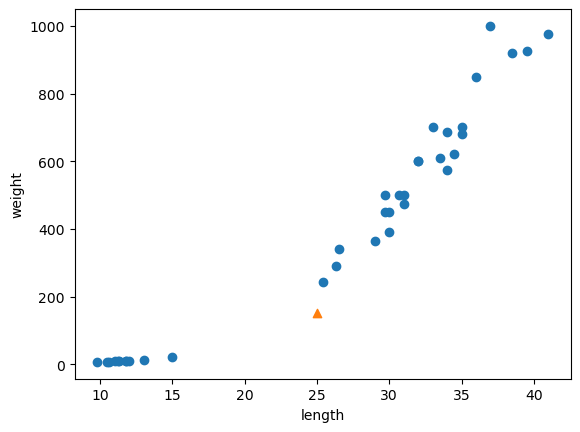

In [20]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
distances, indexes = kn.kneighbors([[25, 150]])

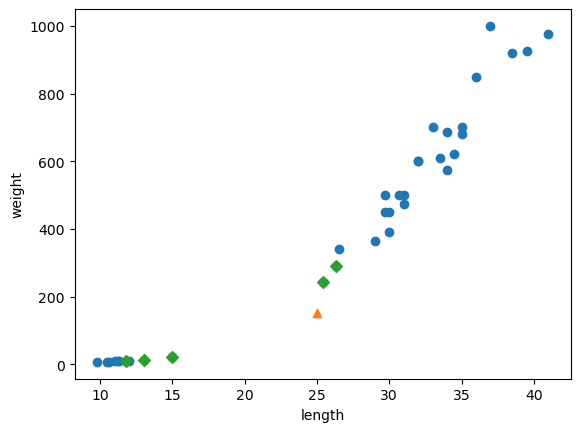

In [23]:
# 데이터 시각화가 중요
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()   #새로 넣은 값 주변의 가장 가까운 데이터가 도미보다 빙어가 더 많다

In [24]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]


In [25]:
print(train_target[indexes])

[[1. 0. 0. 1. 0.]]


## 기준을 맞춰라
* y축은 0부터 1000까지 있는데 x축은 10부터 40까지 있어서 거리계산할때 이상한 값이 나온다. 

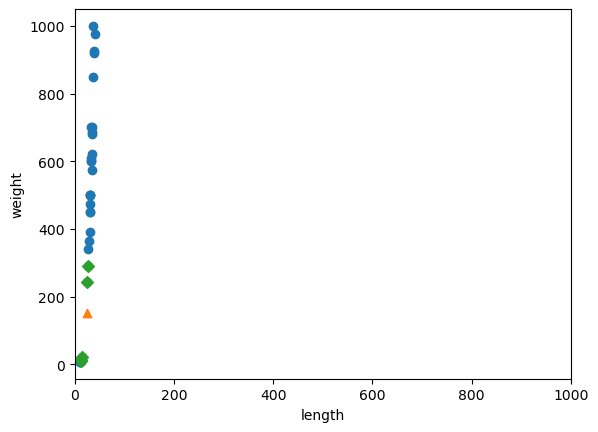

In [27]:
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [29]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [30]:
# z점수 = (특성값 - 평균) / 표준편차
# 사이킷런 standardscaler로 써도 되고 이걸로 써도 되고
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기

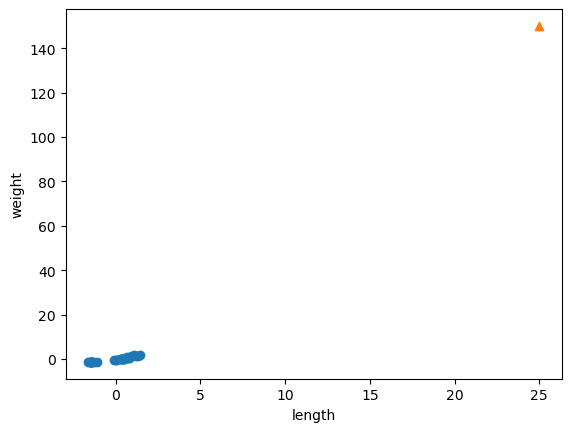

In [32]:
# 새로운 데이터를 그대로 넣었더니 이상한 모양이 나왔다. 이것도 스케일을 맞춰줘야겠다. 
plt.scatter(train_scaled[:, 0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
new = ([25, 150] - mean) / std
new

array([-0.11507497, -0.83340638])

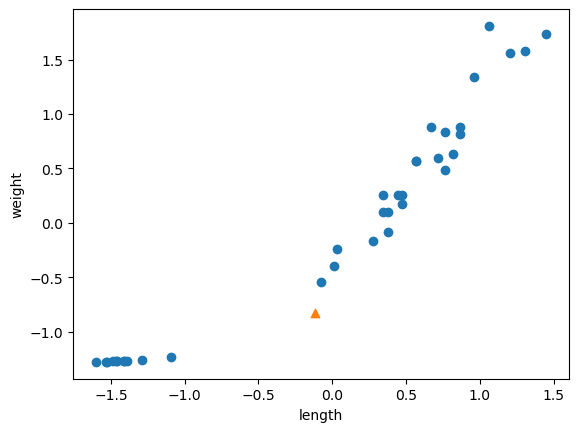

In [36]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [42]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [43]:
test_scaled = (test_input - mean)/std

In [44]:
kn.score(test_scaled, test_target)

1.0

In [45]:
print(kn.predict([new]))    #드디어 도미로 예측했다!

[1.]


In [46]:
distances, indexes = kn.kneighbors([new])

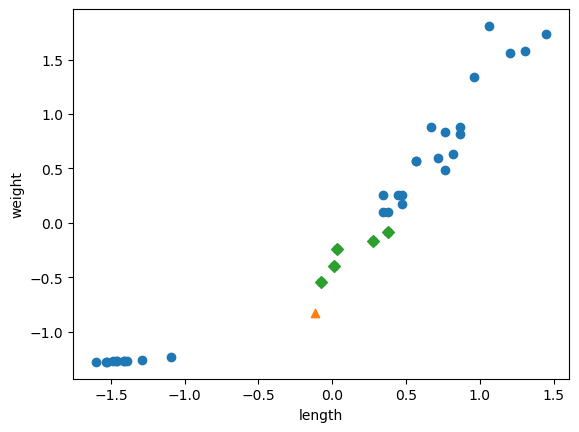

In [47]:
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()